In [1]:

# imports
import os
import sys
import types
import json
import base64

# figure size/format
fig_width = 7
fig_height = 5
fig_format = 'retina'
fig_dpi = 96
interactivity = ''
is_shiny = False
is_dashboard = False
plotly_connected = True

# matplotlib defaults / format
try:
  import matplotlib.pyplot as plt
  plt.rcParams['figure.figsize'] = (fig_width, fig_height)
  plt.rcParams['figure.dpi'] = fig_dpi
  plt.rcParams['savefig.dpi'] = "figure"
  from IPython.display import set_matplotlib_formats
  set_matplotlib_formats(fig_format)
except Exception:
  pass

# plotly use connected mode
try:
  import plotly.io as pio
  if plotly_connected:
    pio.renderers.default = "notebook_connected"
  else:
    pio.renderers.default = "notebook"
  for template in pio.templates.keys():
    pio.templates[template].layout.margin = dict(t=30,r=0,b=0,l=0)
except Exception:
  pass

# disable itables paging for dashboards
if is_dashboard:
  try:
    from itables import options
    options.dom = 'fiBrtlp'
    options.maxBytes = 1024 * 1024
    options.language = dict(info = "Showing _TOTAL_ entries")
    options.classes = "display nowrap compact"
    options.paging = False
    options.searching = True
    options.ordering = True
    options.info = True
    options.lengthChange = False
    options.autoWidth = False
    options.responsive = True
    options.keys = True
    options.buttons = []
  except Exception:
    pass
  
  try:
    import altair as alt
    # By default, dashboards will have container sized
    # vega visualizations which allows them to flow reasonably
    theme_sentinel = '_quarto-dashboard-internal'
    def make_theme(name):
        nonTheme = alt.themes._plugins[name]    
        def patch_theme(*args, **kwargs):
            existingTheme = nonTheme()
            if 'height' not in existingTheme:
              existingTheme['height'] = 'container'
            if 'width' not in existingTheme:
              existingTheme['width'] = 'container'

            if 'config' not in existingTheme:
              existingTheme['config'] = dict()
            
            # Configure the default font sizes
            title_font_size = 15
            header_font_size = 13
            axis_font_size = 12
            legend_font_size = 12
            mark_font_size = 12
            tooltip = False

            config = existingTheme['config']

            # The Axis
            if 'axis' not in config:
              config['axis'] = dict()
            axis = config['axis']
            if 'labelFontSize' not in axis:
              axis['labelFontSize'] = axis_font_size
            if 'titleFontSize' not in axis:
              axis['titleFontSize'] = axis_font_size  

            # The legend
            if 'legend' not in config:
              config['legend'] = dict()
            legend = config['legend']
            if 'labelFontSize' not in legend:
              legend['labelFontSize'] = legend_font_size
            if 'titleFontSize' not in legend:
              legend['titleFontSize'] = legend_font_size  

            # The header
            if 'header' not in config:
              config['header'] = dict()
            header = config['header']
            if 'labelFontSize' not in header:
              header['labelFontSize'] = header_font_size
            if 'titleFontSize' not in header:
              header['titleFontSize'] = header_font_size    

            # Title
            if 'title' not in config:
              config['title'] = dict()
            title = config['title']
            if 'fontSize' not in title:
              title['fontSize'] = title_font_size

            # Marks
            if 'mark' not in config:
              config['mark'] = dict()
            mark = config['mark']
            if 'fontSize' not in mark:
              mark['fontSize'] = mark_font_size

            # Mark tooltips
            if tooltip and 'tooltip' not in mark:
              mark['tooltip'] = dict(content="encoding")

            return existingTheme
            
        return patch_theme

    # We can only do this once per session
    if theme_sentinel not in alt.themes.names():
      for name in alt.themes.names():
        alt.themes.register(name, make_theme(name))
      
      # register a sentinel theme so we only do this once
      alt.themes.register(theme_sentinel, make_theme('default'))
      alt.themes.enable('default')

  except Exception:
    pass

# enable pandas latex repr when targeting pdfs
try:
  import pandas as pd
  if fig_format == 'pdf':
    pd.set_option('display.latex.repr', True)
except Exception:
  pass

# interactivity
if interactivity:
  from IPython.core.interactiveshell import InteractiveShell
  InteractiveShell.ast_node_interactivity = interactivity

# NOTE: the kernel_deps code is repeated in the cleanup.py file
# (we can't easily share this code b/c of the way it is run).
# If you edit this code also edit the same code in cleanup.py!

# output kernel dependencies
kernel_deps = dict()
for module in list(sys.modules.values()):
  # Some modules play games with sys.modules (e.g. email/__init__.py
  # in the standard library), and occasionally this can cause strange
  # failures in getattr.  Just ignore anything that's not an ordinary
  # module.
  if not isinstance(module, types.ModuleType):
    continue
  path = getattr(module, "__file__", None)
  if not path:
    continue
  if path.endswith(".pyc") or path.endswith(".pyo"):
    path = path[:-1]
  if not os.path.exists(path):
    continue
  kernel_deps[path] = os.stat(path).st_mtime
print(json.dumps(kernel_deps))

# set run_path if requested
run_path = 'L1VzZXJzL2FwdXJ2YW5ha2FkZS9HaXRodWIvTW9udGUtQ2FybG8tTWV0aG9kcy9jaGFwdGVycy9zYW1wbGluZw=='
if run_path:
  # hex-decode the path
  run_path = base64.b64decode(run_path.encode("utf-8")).decode("utf-8")
  os.chdir(run_path)

# reset state
%reset

# shiny
# Checking for shiny by using False directly because we're after the %reset. We don't want
# to set a variable that stays in global scope.
if False:
  try:
    import htmltools as _htmltools
    import ast as _ast

    _htmltools.html_dependency_render_mode = "json"

    # This decorator will be added to all function definitions
    def _display_if_has_repr_html(x):
      try:
        # IPython 7.14 preferred import
        from IPython.display import display, HTML
      except:
        from IPython.core.display import display, HTML

      if hasattr(x, '_repr_html_'):
        display(HTML(x._repr_html_()))
      return x

    # ideally we would undo the call to ast_transformers.append
    # at the end of this block whenver an error occurs, we do 
    # this for now as it will only be a problem if the user 
    # switches from shiny to not-shiny mode (and even then likely
    # won't matter)
    import builtins
    builtins._display_if_has_repr_html = _display_if_has_repr_html

    class _FunctionDefReprHtml(_ast.NodeTransformer):
      def visit_FunctionDef(self, node):
        node.decorator_list.insert(
          0,
          _ast.Name(id="_display_if_has_repr_html", ctx=_ast.Load())
        )
        return node

      def visit_AsyncFunctionDef(self, node):
        node.decorator_list.insert(
          0,
          _ast.Name(id="_display_if_has_repr_html", ctx=_ast.Load())
        )
        return node

    ip = get_ipython()
    ip.ast_transformers.append(_FunctionDefReprHtml())

  except:
    pass

def ojs_define(**kwargs):
  import json
  try:
    # IPython 7.14 preferred import
    from IPython.display import display, HTML
  except:
    from IPython.core.display import display, HTML

  # do some minor magic for convenience when handling pandas
  # dataframes
  def convert(v):
    try:
      import pandas as pd
    except ModuleNotFoundError: # don't do the magic when pandas is not available
      return v
    if type(v) == pd.Series:
      v = pd.DataFrame(v)
    if type(v) == pd.DataFrame:
      j = json.loads(v.T.to_json(orient='split'))
      return dict((k,v) for (k,v) in zip(j["index"], j["data"]))
    else:
      return v

  v = dict(contents=list(dict(name=key, value=convert(value)) for (key, value) in kwargs.items()))
  display(HTML('<script type="ojs-define">' + json.dumps(v) + '</script>'), metadata=dict(ojs_define = True))
globals()["ojs_define"] = ojs_define
globals()["__spec__"] = None

/var/folders/2y/zsgtjj415jdb0d4y2b_wx7th0000gn/T/ipykernel_52081/428447725.py:25: DeprecationWarning: `set_matplotlib_formats` is deprecated since IPython 7.23, directly use `matplotlib_inline.backend_inline.set_matplotlib_formats()`
  set_matplotlib_formats(fig_format)


{"/Users/apurvanakade/miniconda3/lib/python3.12/importlib/_bootstrap.py": 1708117302.8894389, "/Users/apurvanakade/miniconda3/lib/python3.12/importlib/_bootstrap_external.py": 1708117302.895673, "/Users/apurvanakade/miniconda3/lib/python3.12/zipimport.py": 1708117300.842618, "/Users/apurvanakade/miniconda3/lib/python3.12/codecs.py": 1708117300.2231953, "/Users/apurvanakade/miniconda3/lib/python3.12/encodings/aliases.py": 1708117301.4904184, "/Users/apurvanakade/miniconda3/lib/python3.12/encodings/__init__.py": 1708117301.4862745, "/Users/apurvanakade/miniconda3/lib/python3.12/encodings/utf_8.py": 1708117302.0979323, "/Users/apurvanakade/miniconda3/lib/python3.12/abc.py": 1708117300.1248448, "/Users/apurvanakade/miniconda3/lib/python3.12/io.py": 1708117300.4300423, "/Users/apurvanakade/miniconda3/lib/python3.12/stat.py": 1708117300.6806324, "/Users/apurvanakade/miniconda3/lib/python3.12/_collections_abc.py": 1708117300.0486746, "/Users/apurvanakade/miniconda3/lib/python3.12/genericpath.

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from shapely.geometry import Point
from shapely.geometry.polygon import Polygon


np.random.seed(0)

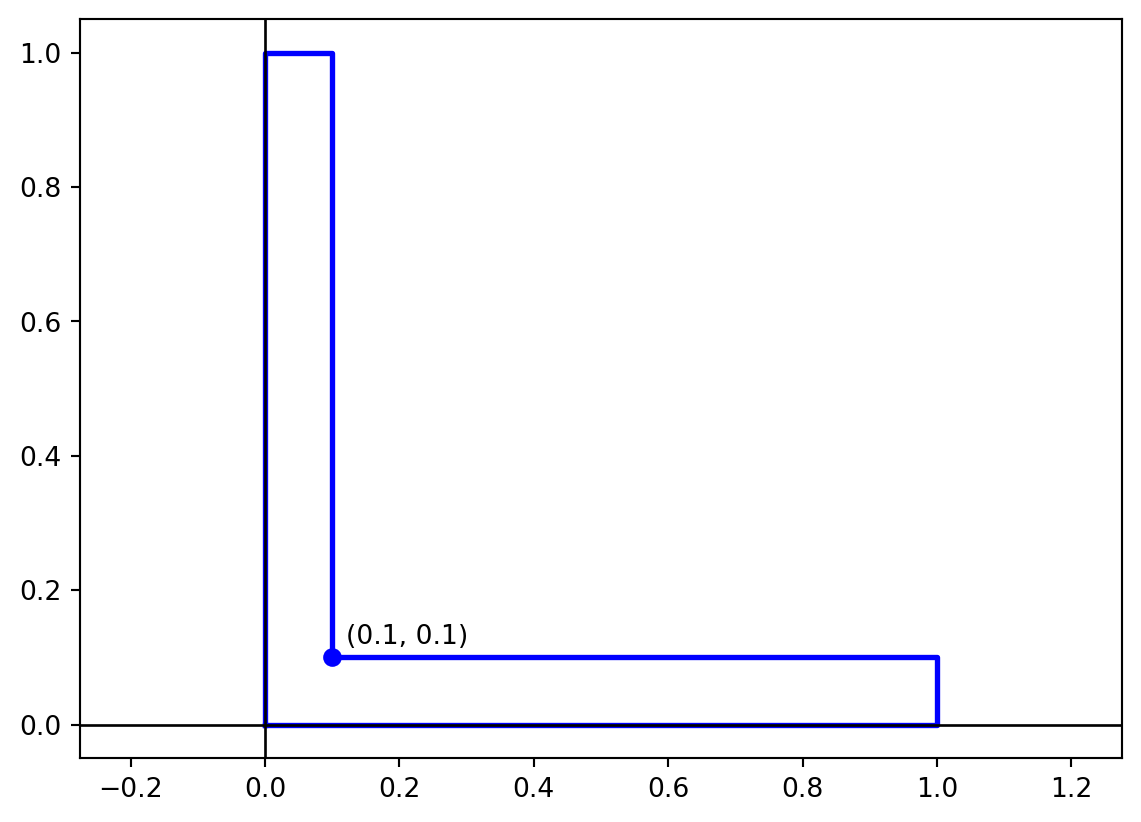

In [3]:
# Draw an L shaped region in R2 
def L_shape():
    width = 0.1
    height = 0.1
    X = np.array([[0, 0], [1, 0], [1, height], [width, height], [width, 1], [0, 1], [0, 0]])
    return X

# plot the polygon
def plot_polygon(X):
    # increase thickness of lines
    plt.rcParams['lines.linewidth'] = 2

    # plot the polygon
    plt.plot(X[:, 0], X[:, 1], 'b')

    plt.axhline(0, color='black', lw=1)
    plt.axvline(0, color='black', lw=1)
    plt.axis('equal')
    
    # label the point (width, height)
    plt.text(X[3, 0] * 1.2, X[3, 1] * 1.2, f'({X[3, 0]}, {X[3, 1]})', fontsize=10)
    # mark the point (width, height)
    plt.plot(X[3, 0], X[3, 1], 'bo')

    return plt

region = L_shape()
plt = plot_polygon(region)
plt.show()

In [4]:
# nearby candidate points
def generate_candidate(x, y, sigma, distribution):
    if distribution == "uniform":
        x_new = np.random.uniform(x - sigma, x + sigma)
        y_new = np.random.uniform(y - sigma, y + sigma)
    elif distribution == "normal":
        x_new = np.random.normal(x, sigma)
        y_new = np.random.normal(y, sigma)
    return [x_new, y_new]
  
# check if a point is in the region
def is_in_region(x, region):
  return Polygon(region).contains(Point(x))

def Metropolis_Hastings(n, X, sigma, search_distribution):
  for i in range(n):
    new_sample = generate_candidate(X[-1][0], X[-1][1], sigma, search_distribution)
    if is_in_region(new_sample, region):
      X.append(new_sample)  
  return X

def find_running_avgs(X, fun):

  running_avgs = np.zeros(len(X))

  running_avgs[0] = fun(X[0])
  for i in range(len(X) - 1):
    running_avgs[i+1] = (i * running_avgs[i] + fun(X[i+1]))/(i+1)

  return running_avgs

def plot_samples(region, X, sigma, n):
  import matplotlib.pyplot as plt

  plt.figure(figsize=(10, 5))
  
  plt.subplot(1, 2, 1)

  plt = plot_polygon(region)
  for i in range(len(X)):
    plt.plot(X[i][0], X[i][1], 'r.', markersize=1, alpha=0.5)

  # draw a filled circle at the last point of radius sigma
  circle = plt.Circle((X[-1][0], X[-1][1]), sigma, color='y', fill=True, alpha=0.25)
  plt.gca().add_artist(circle)

  plt.plot(X[0][0], X[0][1], 'o', markersize=5, label="start", color="black")
  plt.plot(X[-1][0], X[-1][1], 'gx', markersize=10, label="end")

  # show the value of k, sigma, and acceptance rate on the plot as a text block
  textstr = f'sigma = {sigma}\nacceptance rate = {len(X)/n:.4f}'
  props = dict(facecolor='white')
  plt.gca().text(0.95, 0.95, textstr, transform=plt.gca().transAxes, fontsize=10,
                 verticalalignment='top', horizontalalignment='right', bbox=props)
  
  plt.subplot(1, 2, 2)
  # plot running average of x and y side by side
  running_avgs_x = find_running_avgs(X, lambda x: x[0])
  running_avgs_y = find_running_avgs(X, lambda x: x[1])

  plt.plot(running_avgs_x, label="x", color='b')
  plt.axhline(running_avgs_x[-1], color='b', linestyle='--')
  plt.plot(running_avgs_y, label="y", color='orange')
  plt.axhline(running_avgs_y[-1], color='orange', linestyle='--')
  plt.legend()

  plt.show()

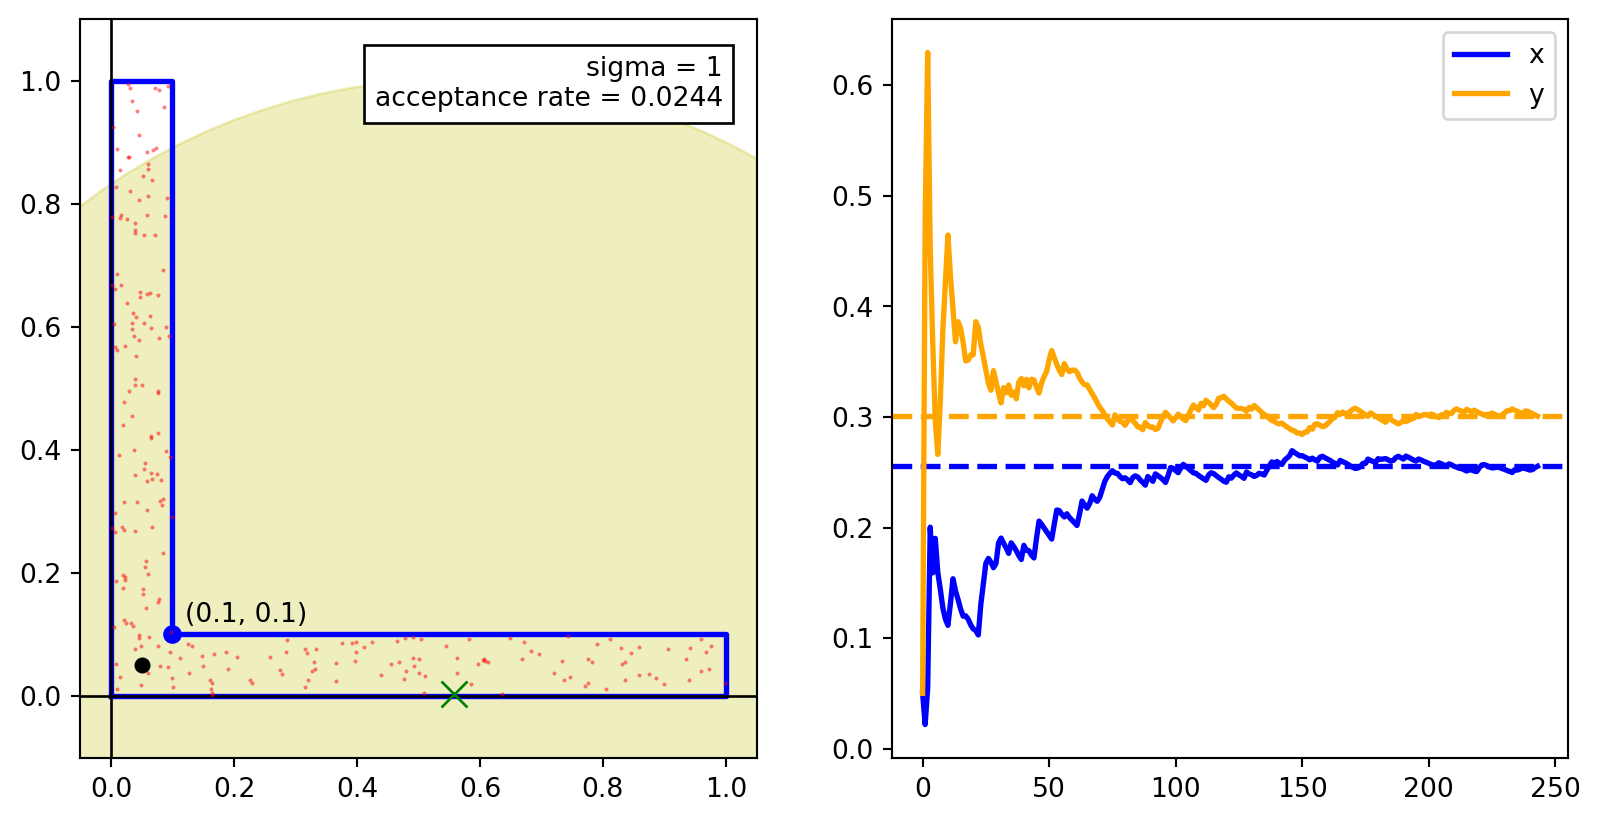

In [5]:
n = 10000
sigma = 1
np.random.seed(0)

start = [[0.05, 0.05]]
search_distribution = "normal"

# np.random.seed(1)
X = Metropolis_Hastings(n, start, sigma, search_distribution)

plot_samples(region, X, sigma, n)

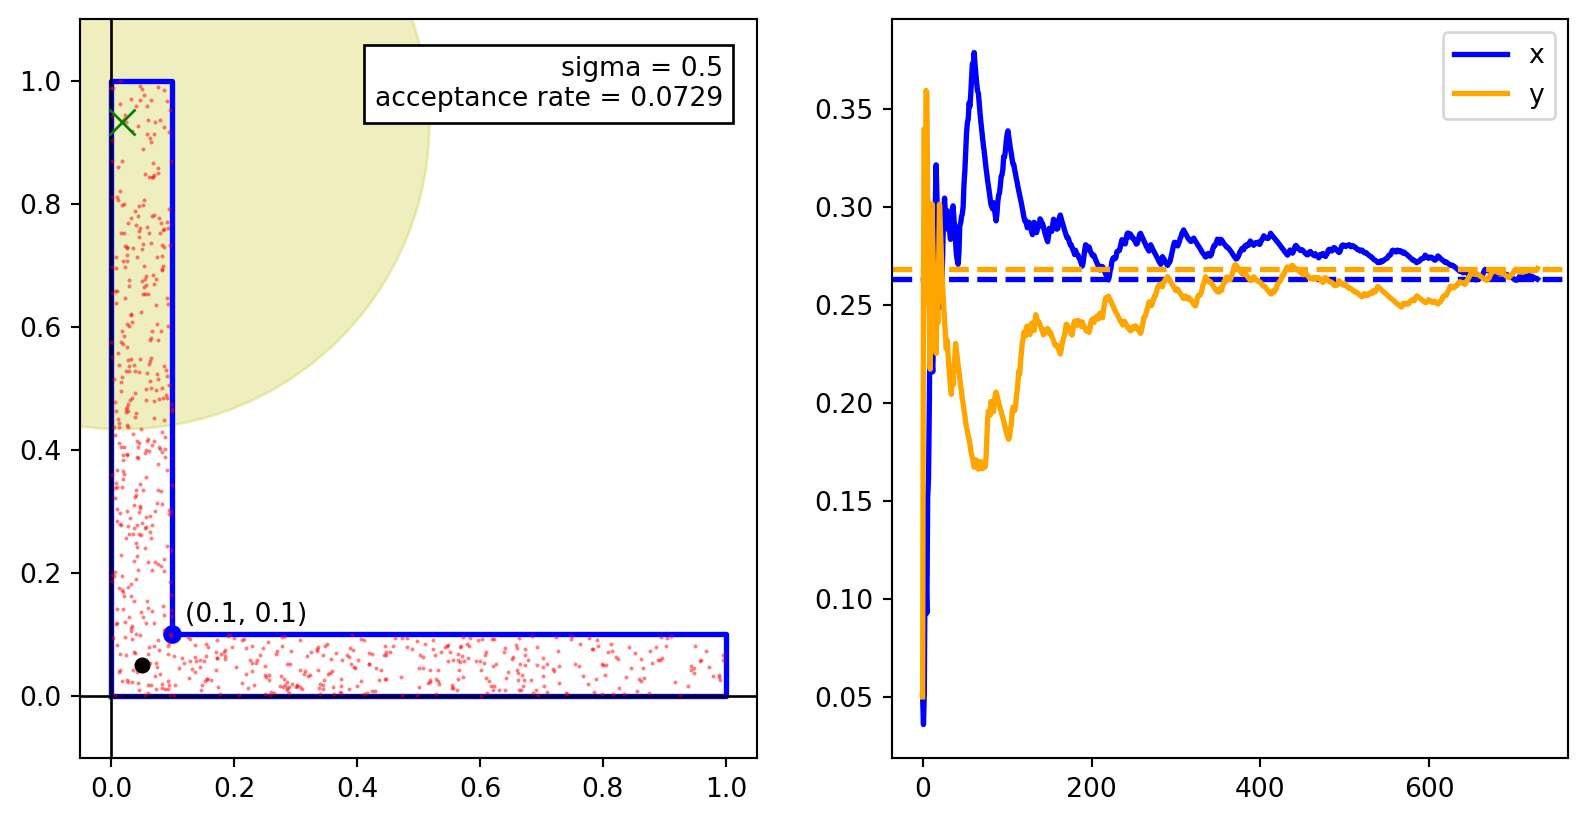

In [6]:
n = 10000
sigma = 0.5
np.random.seed(0)

start = [[0.05, 0.05]]
search_distribution = "normal"

# np.random.seed(1)
X = Metropolis_Hastings(n, start, sigma, search_distribution)

plot_samples(region, X, sigma, n)

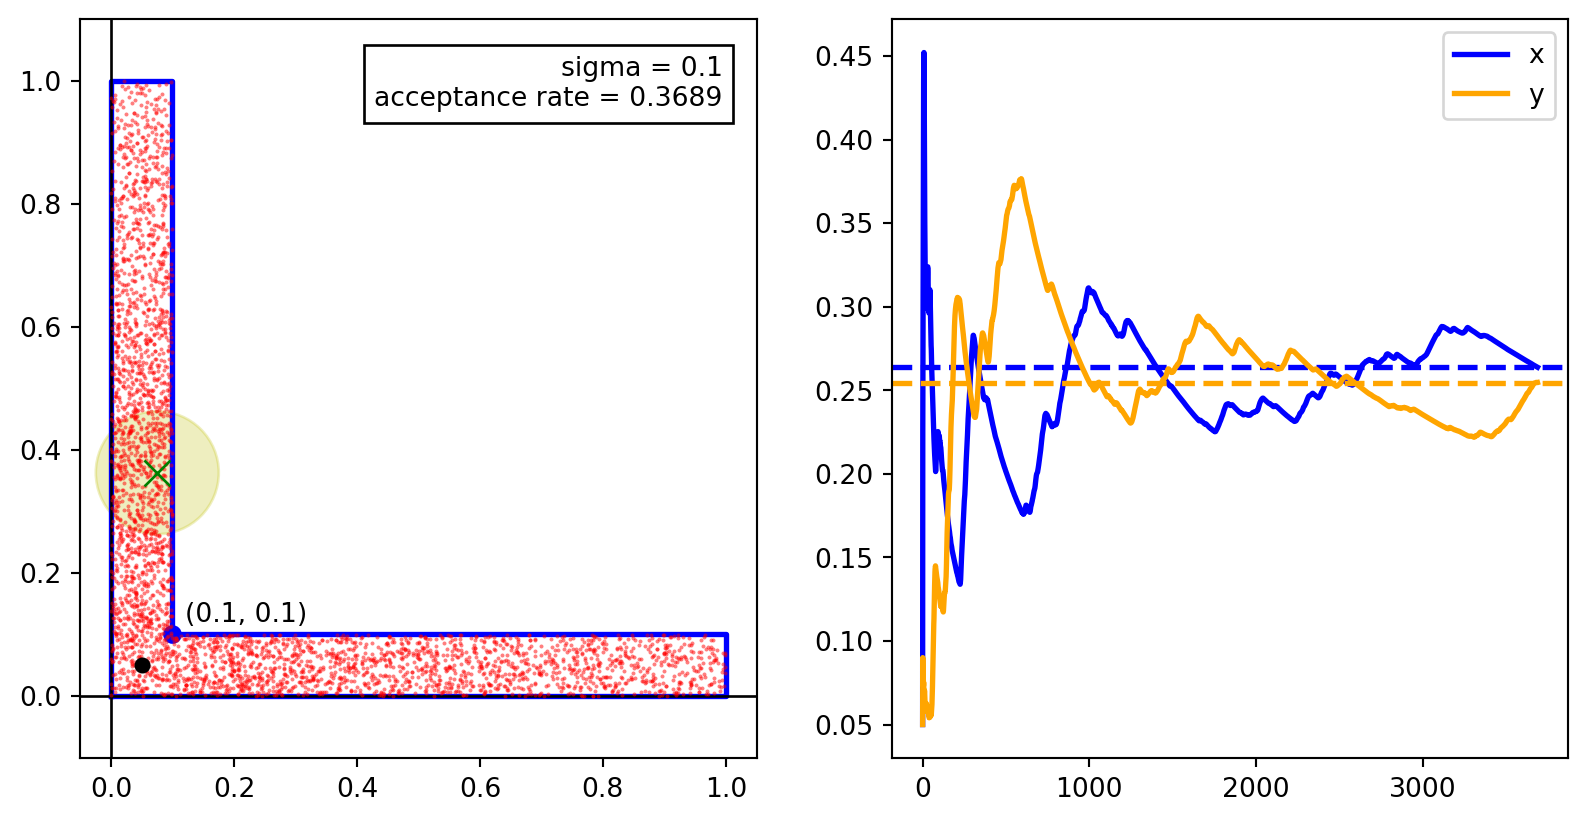

In [7]:
n = 10000
sigma = 0.1
np.random.seed(0)

start = [[0.05, 0.05]]
search_distribution = "normal"

# np.random.seed(1)
X = Metropolis_Hastings(n, start, sigma, search_distribution)

plot_samples(region, X, sigma, n)

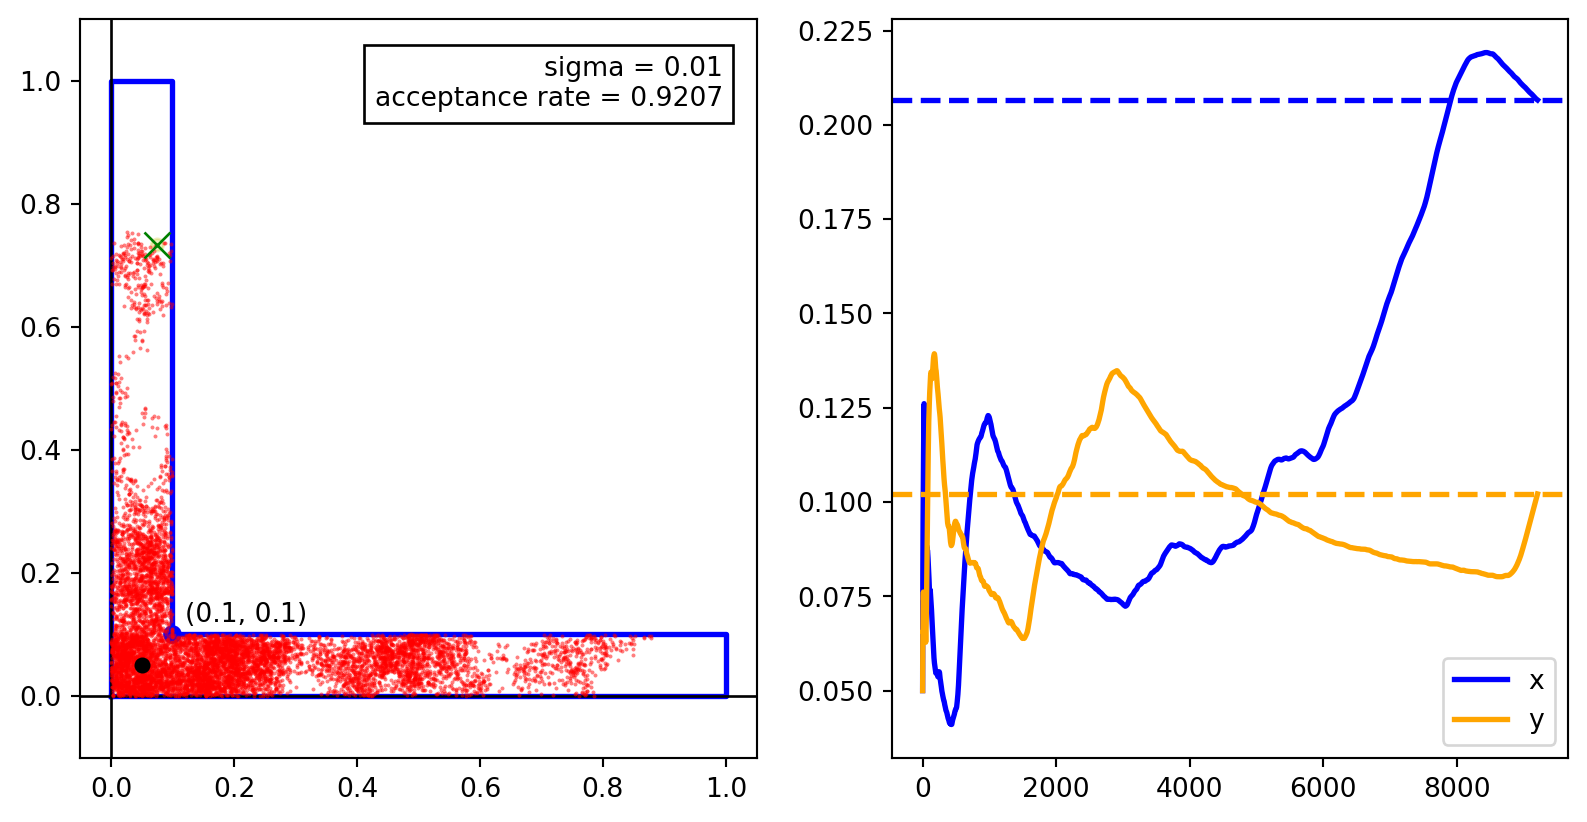

In [8]:
n = 10000
sigma = 0.01
np.random.seed(0)

start = [[0.05, 0.05]]
search_distribution = "normal"

# np.random.seed(1)
X = Metropolis_Hastings(n, start, sigma, search_distribution)

plot_samples(region, X, sigma, n)